In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
885,2020-07-05,United Kingdom,258495.0,284900.0,44273.0,44198.0,-26405.0,75.0
886,2020-07-05,Germany,196608.0,196335.0,9028.0,9012.0,273.0,16.0
887,2020-07-05,Iran,238610.0,237878.0,11397.0,11408.0,732.0,-11.0
888,2020-07-05,Turkey,204570.0,204610.0,5202.0,5206.0,-40.0,-4.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2657.6516853932585
RMSE =  6332.5172514037295


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  310.9505617977528
RMSE =  715.5708729100867


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  13140.758620689656
RMSE =  16572.932223440686
-- World performances for deaths --
MAE =  1578.6781609195402
RMSE =  1925.5381663018413


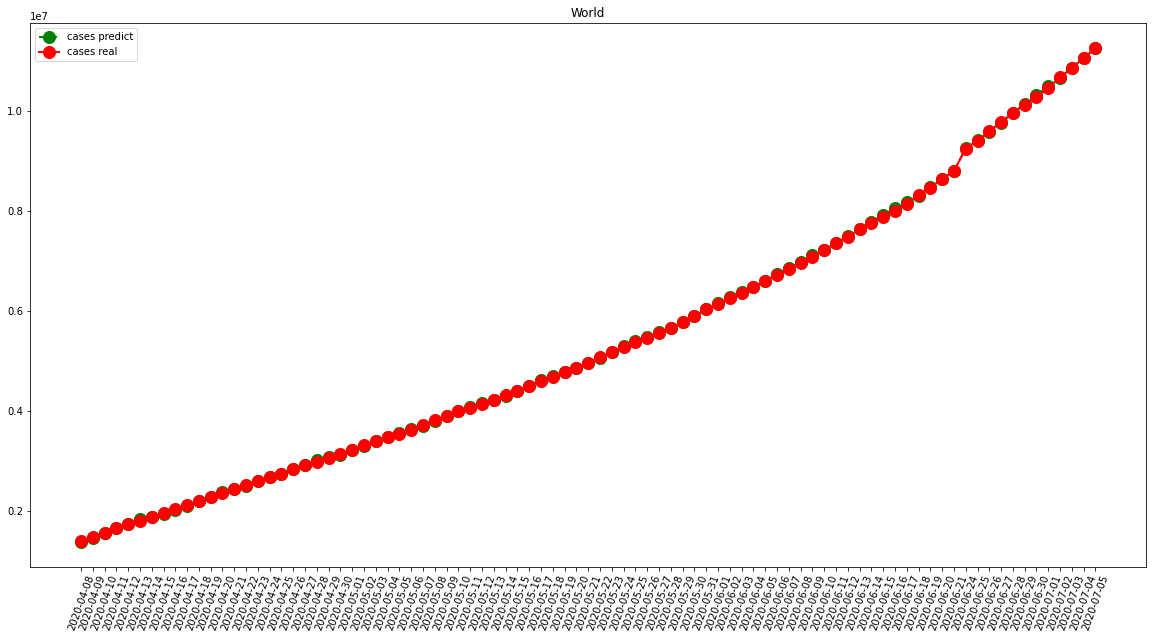

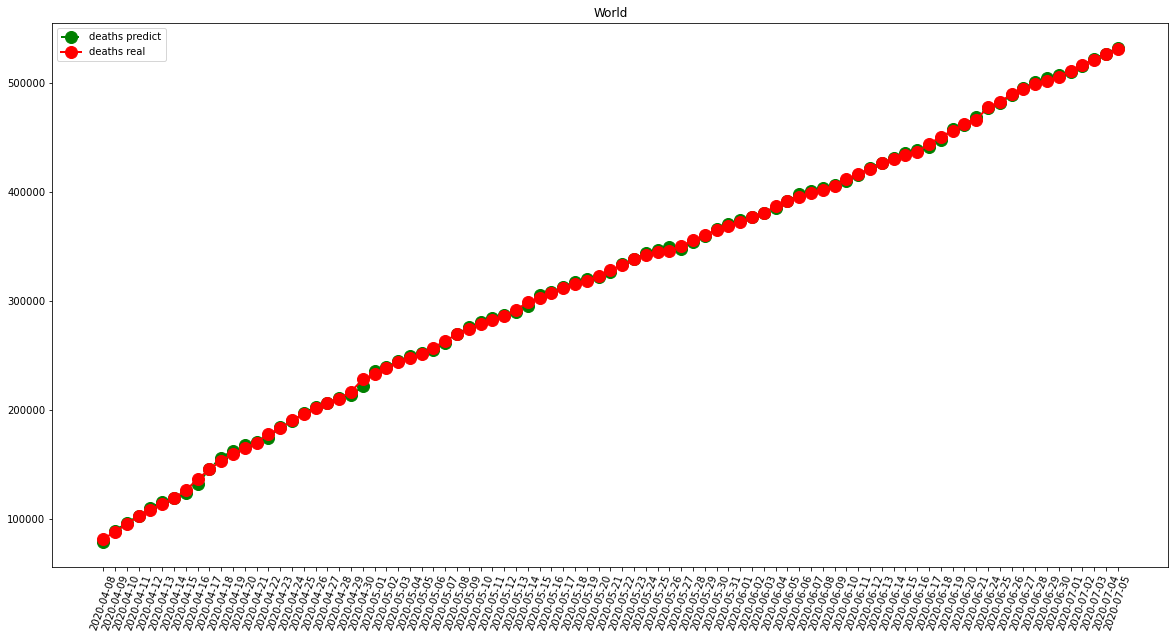

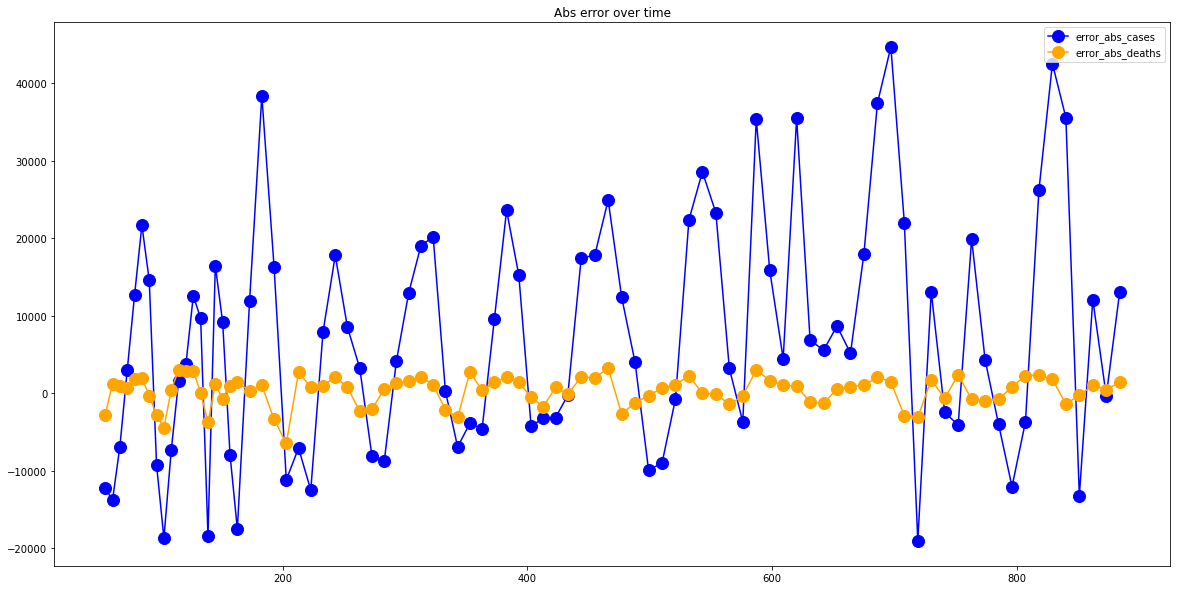

In [7]:
visShow("World")

-- France performances for cases --
MAE =  883.1134020618557
RMSE =  1464.383702745281
-- France performances for deaths --
MAE =  181.53608247422682
RMSE =  340.07896293497464


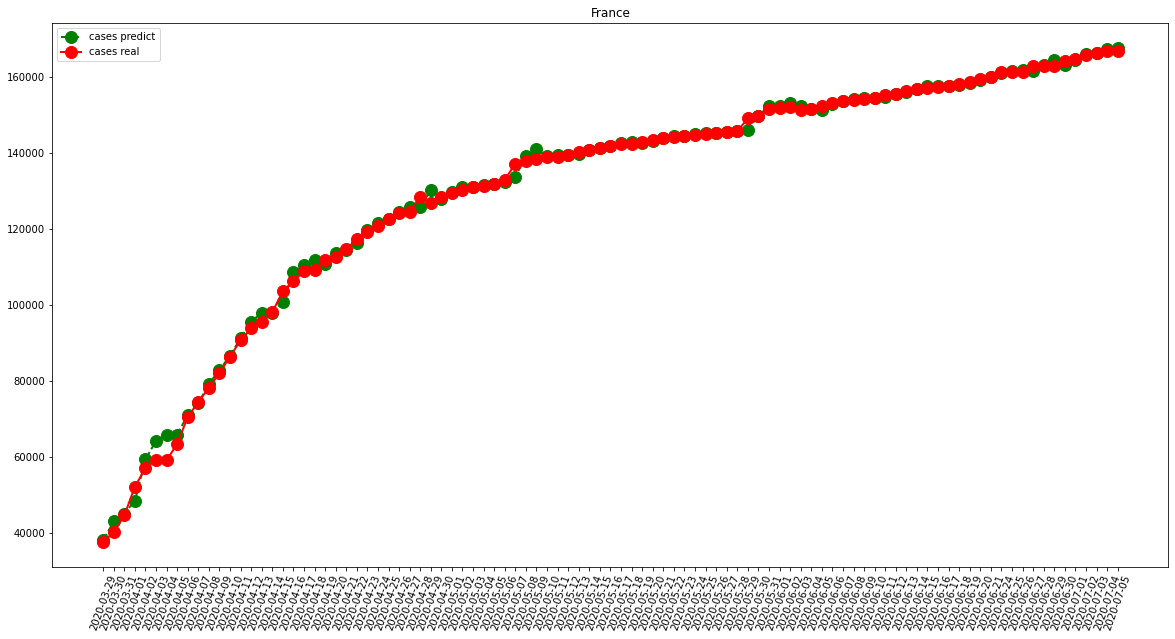

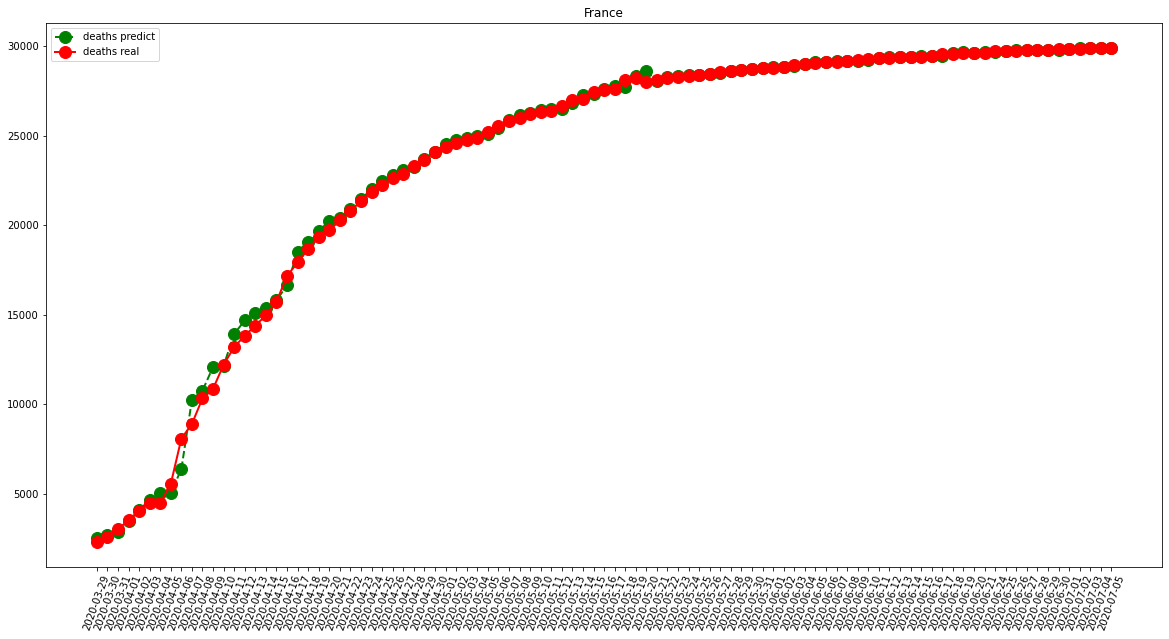

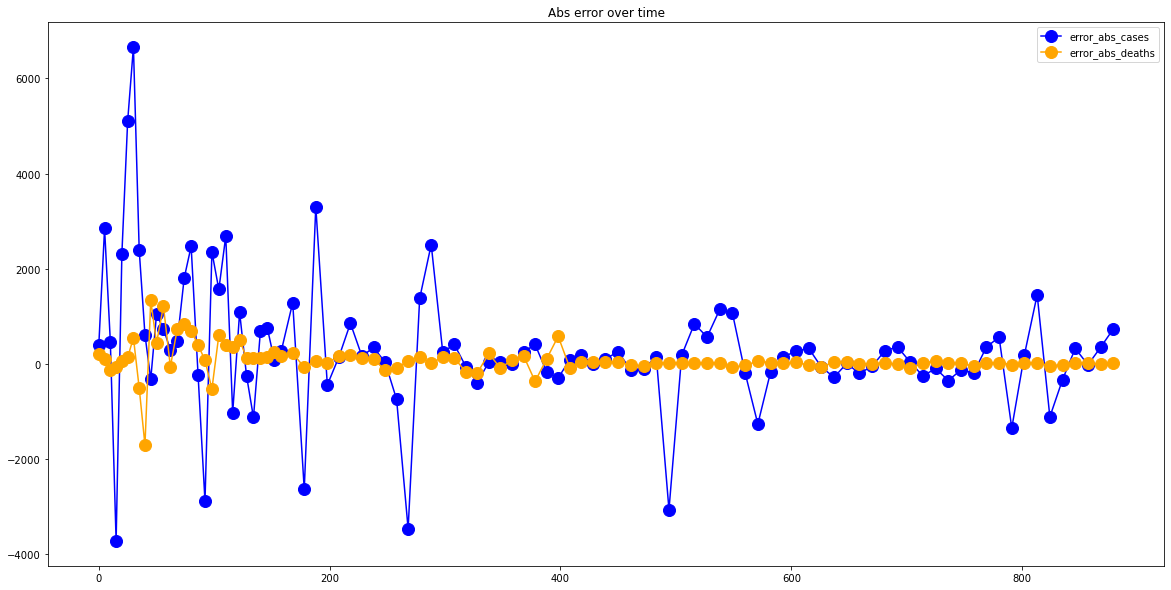

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  378.680412371134
RMSE =  550.0487513538953
-- Italy performances for deaths --
MAE =  99.72164948453609
RMSE =  300.22652959417985


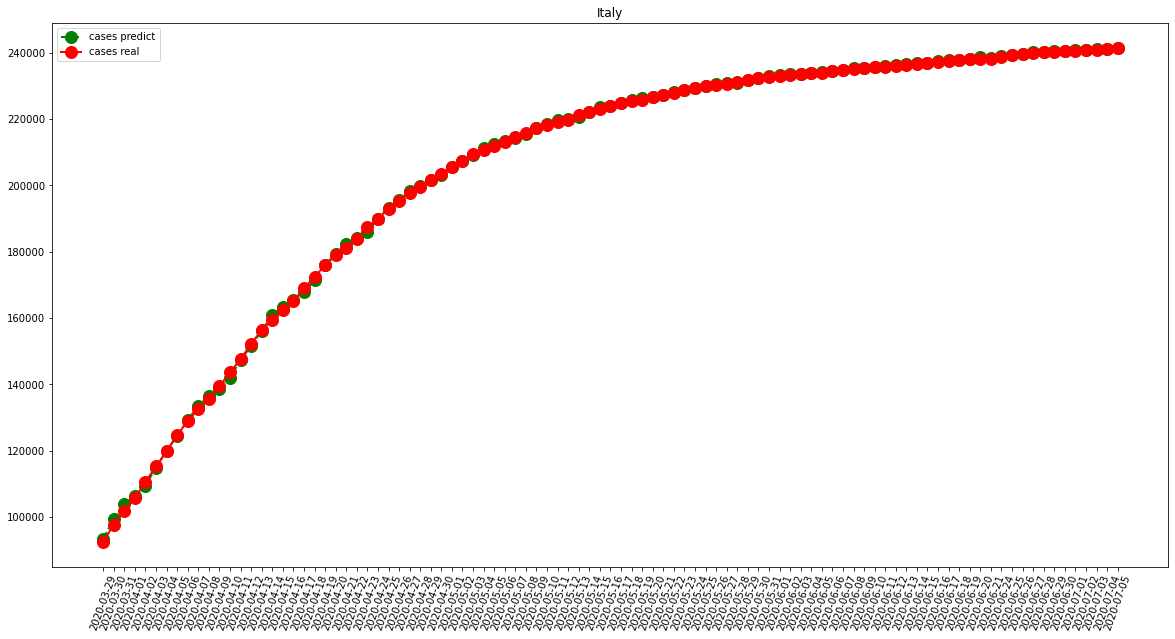

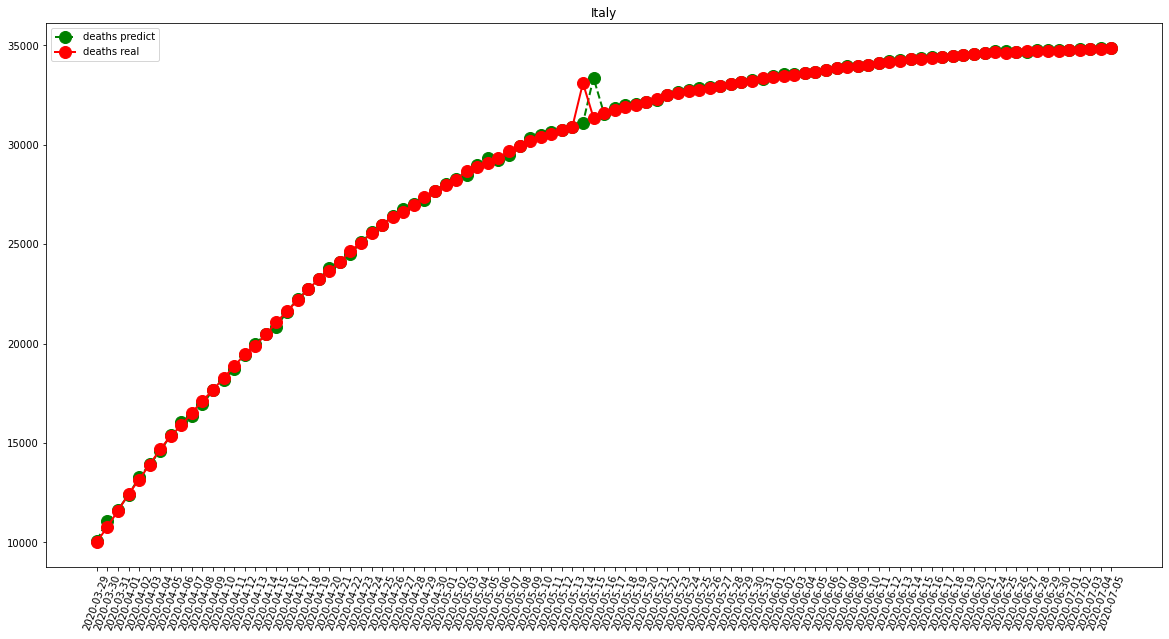

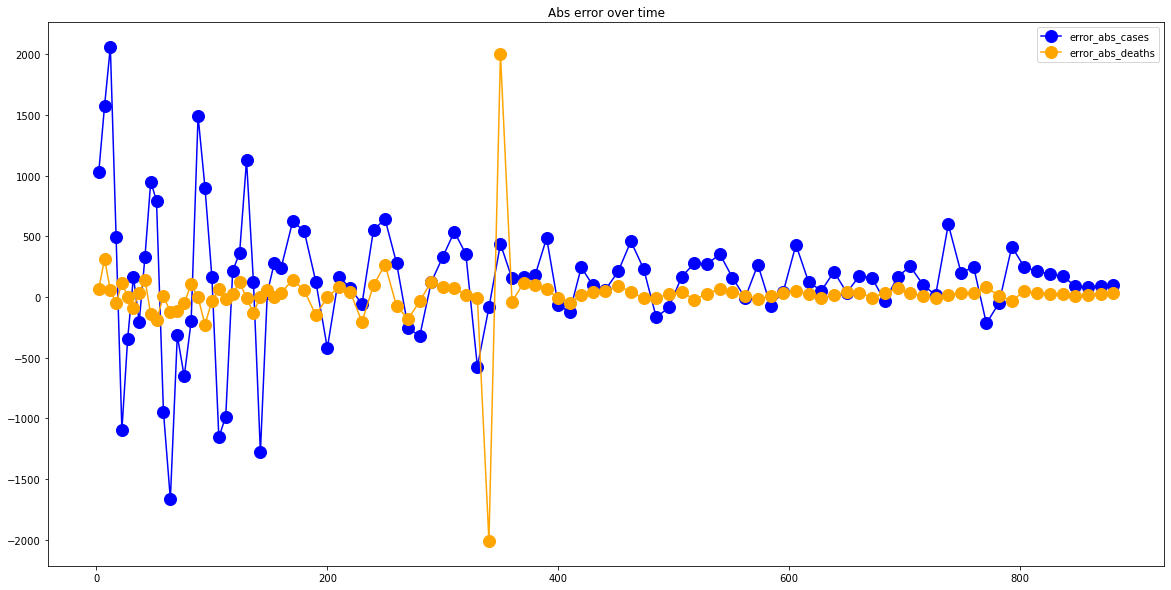

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  859.6907216494845
RMSE =  2075.7929102358858
-- Spain performances for deaths --
MAE =  186.5257731958763
RMSE =  412.10054073017557


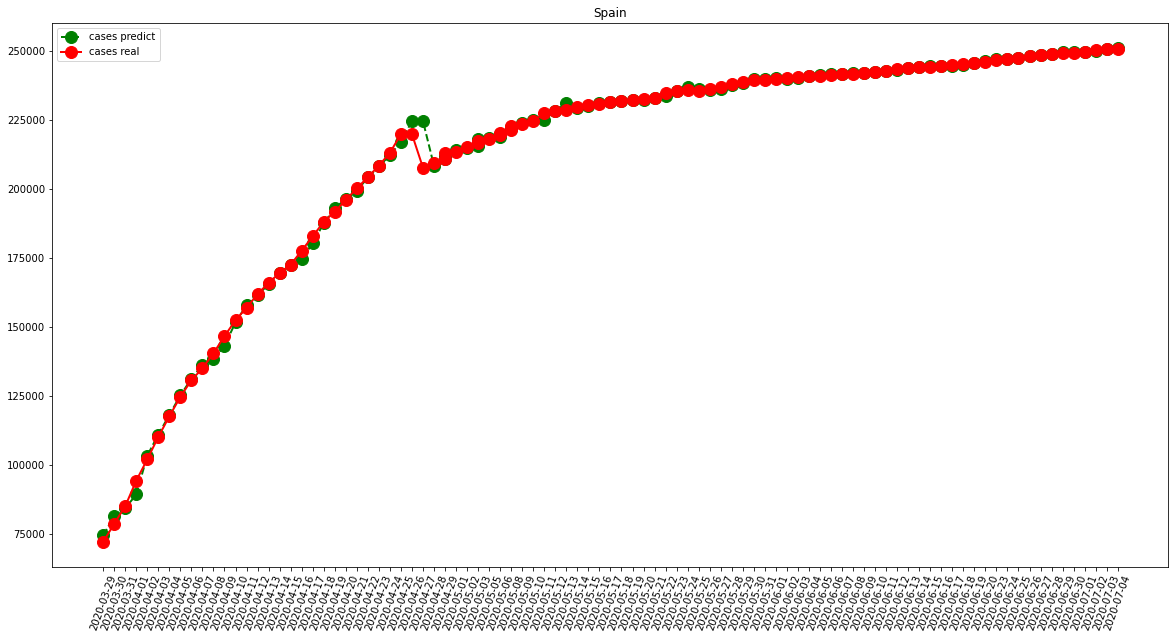

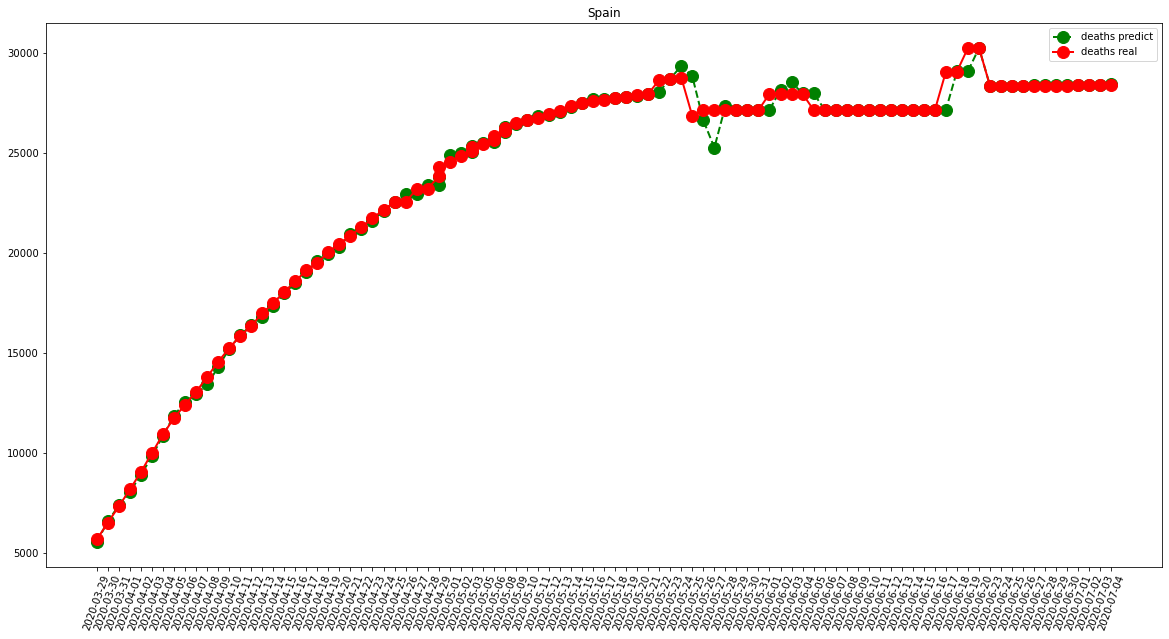

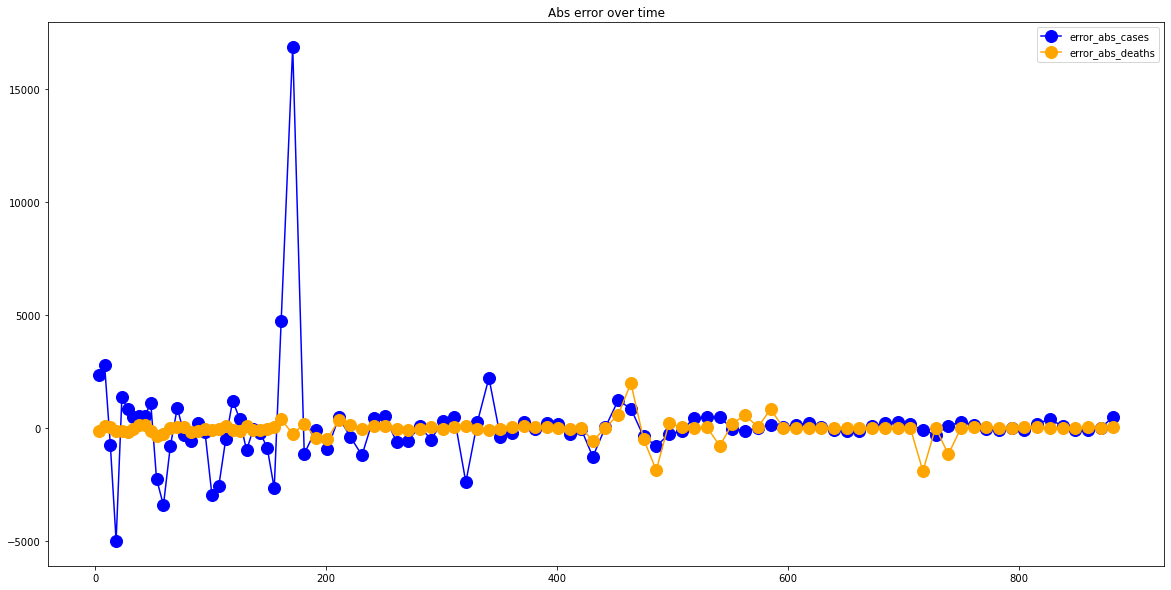

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  4854.948453608247
RMSE =  6645.415198062434
-- United States performances for deaths --
MAE =  540.4639175257732
RMSE =  789.0294116008187


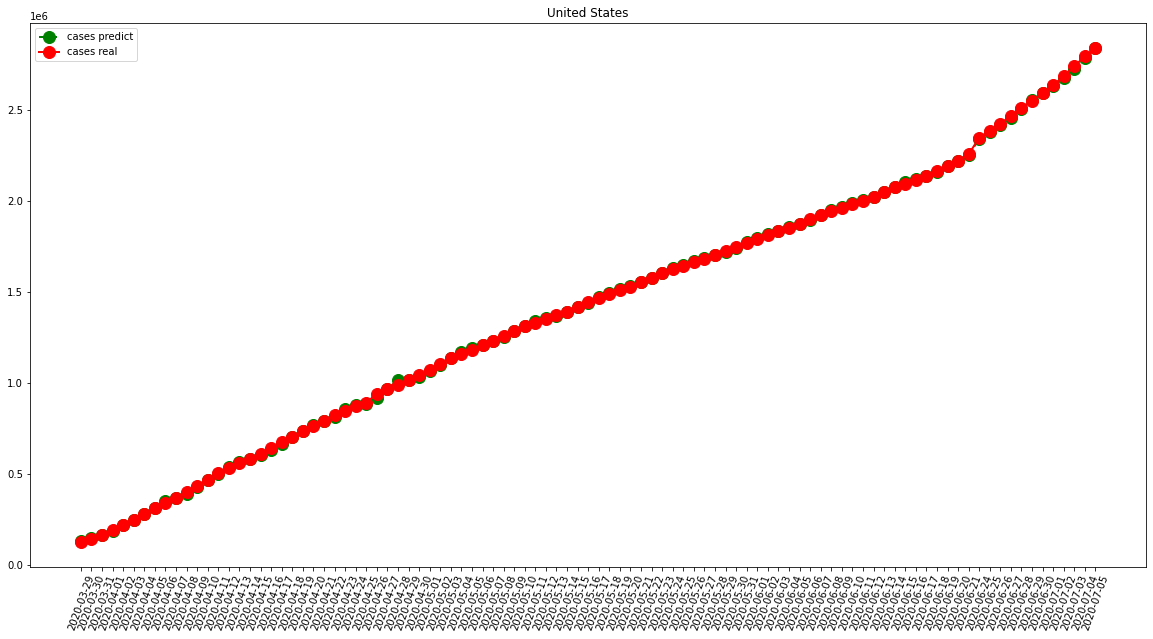

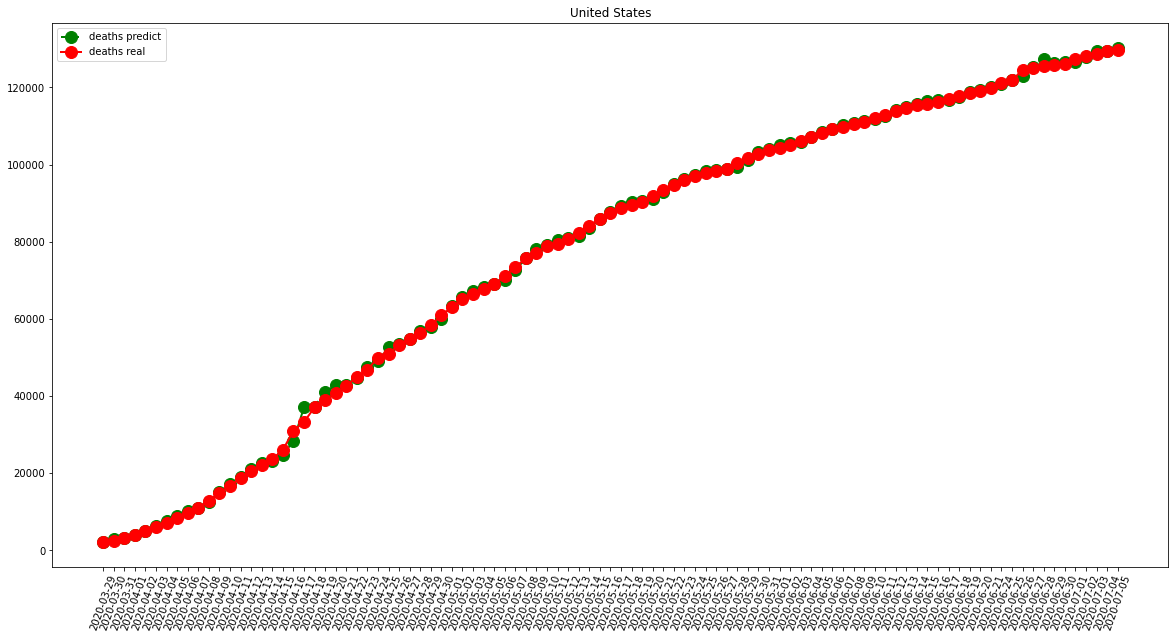

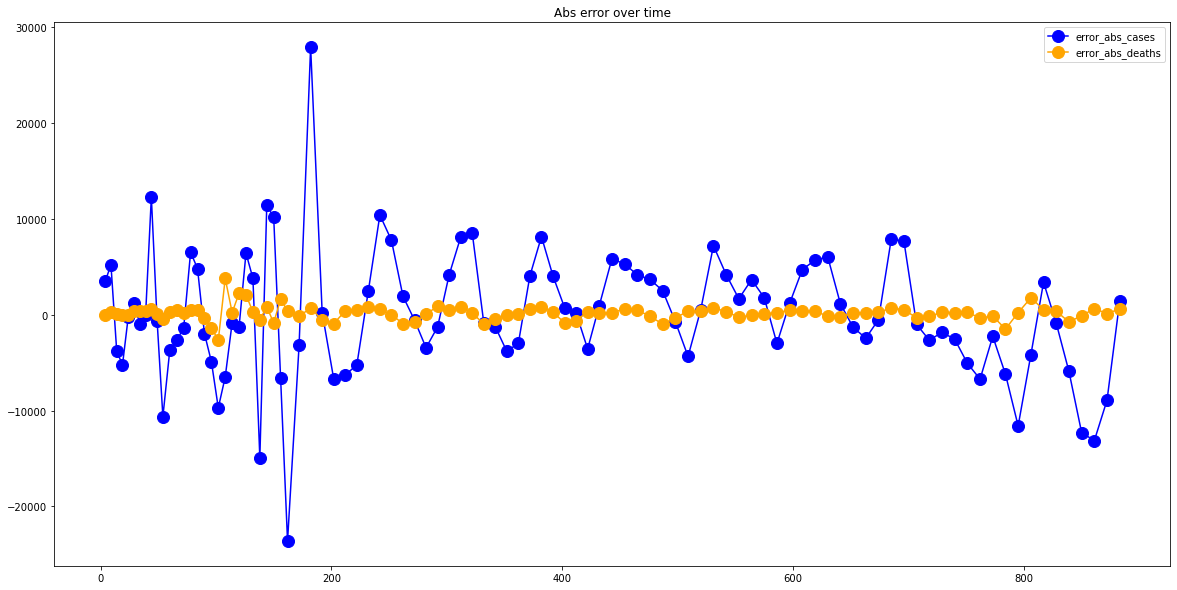

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  90.95876288659794
RMSE =  119.53919255499859
-- China performances for deaths --
MAE =  39.31958762886598
RMSE =  159.350744566238


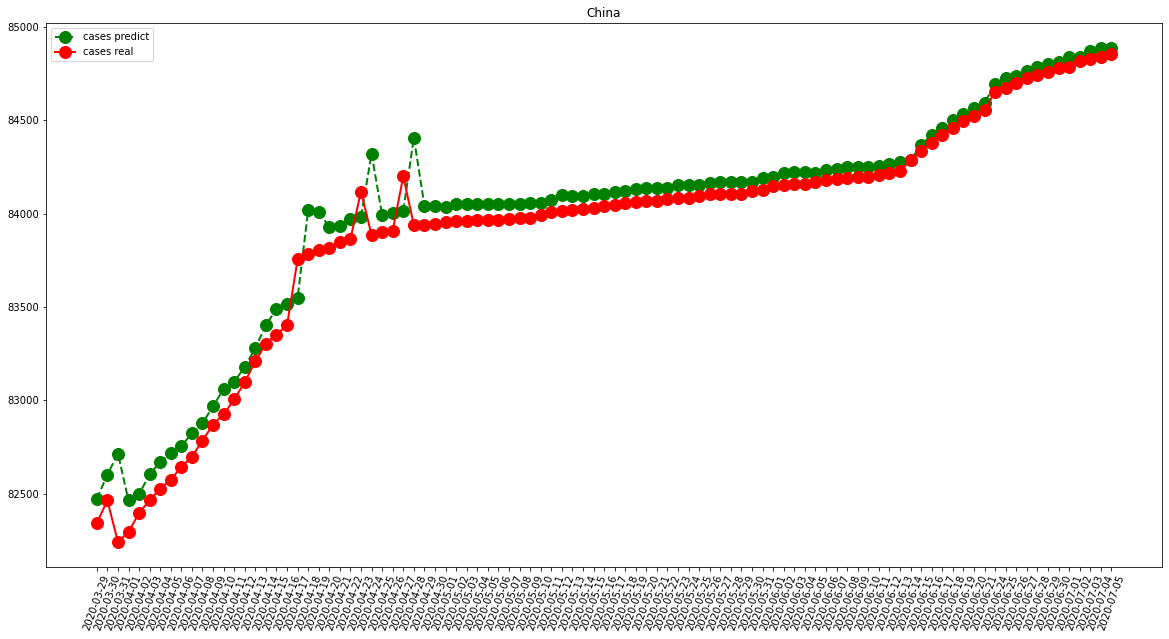

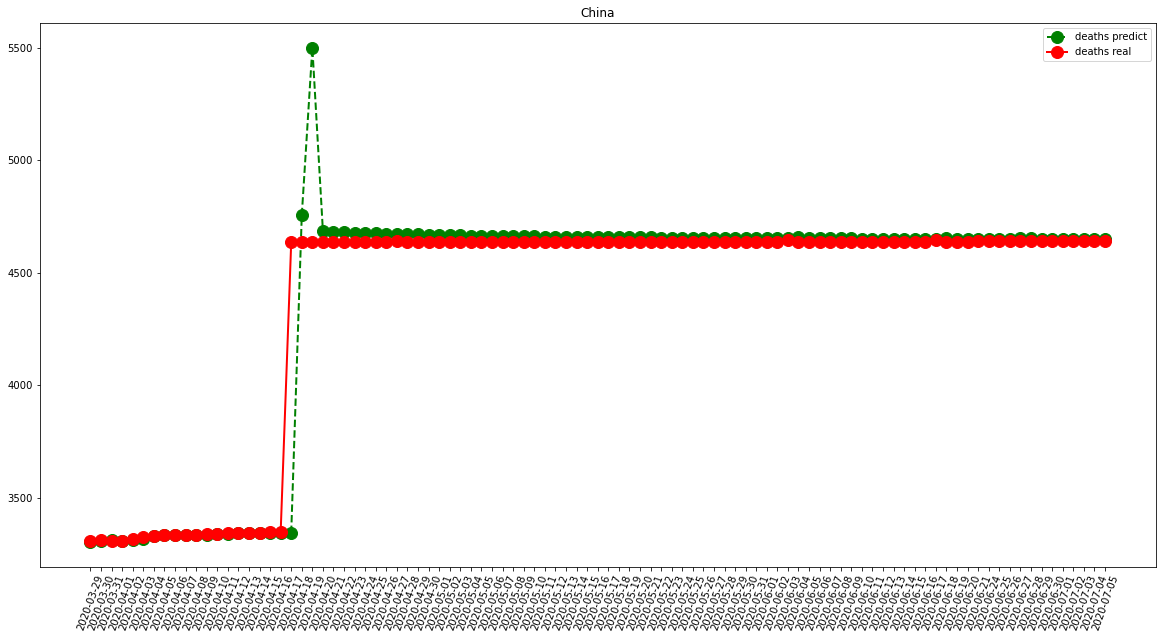

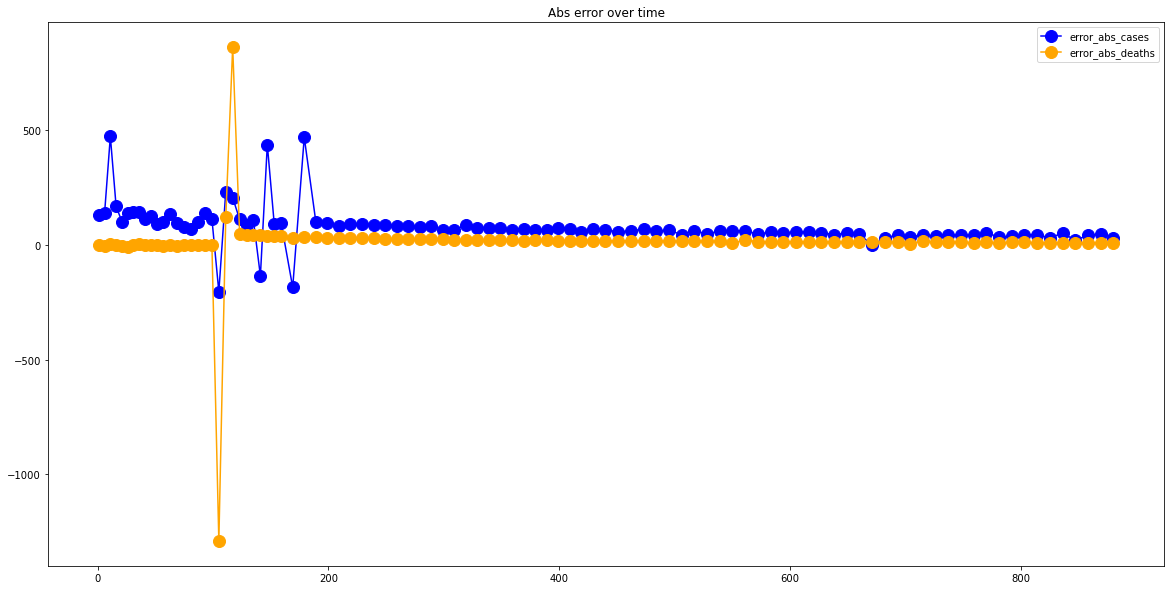

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1643.6811594202898
RMSE =  5018.875048616292
-- United Kingdom performances for deaths --
MAE =  249.46376811594203
RMSE =  588.2808532655474


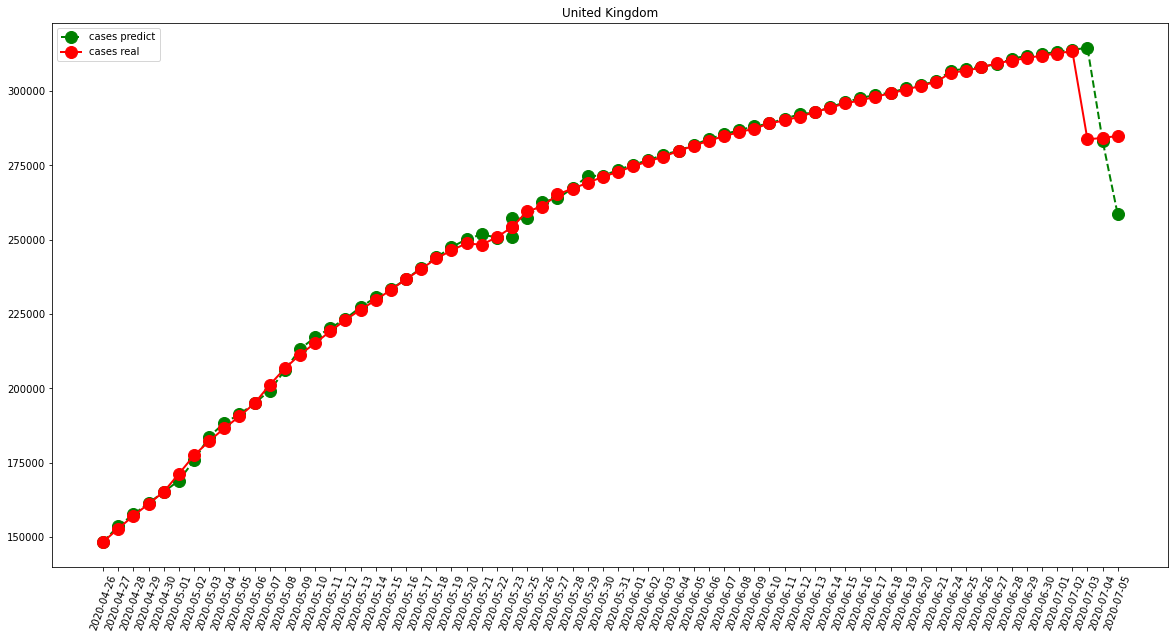

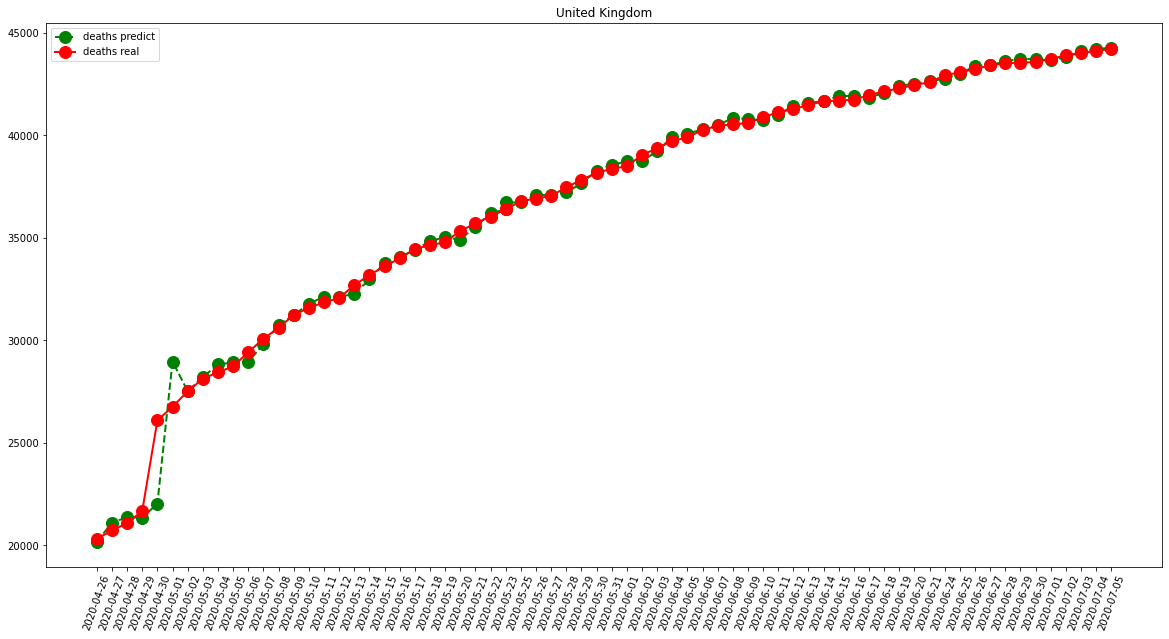

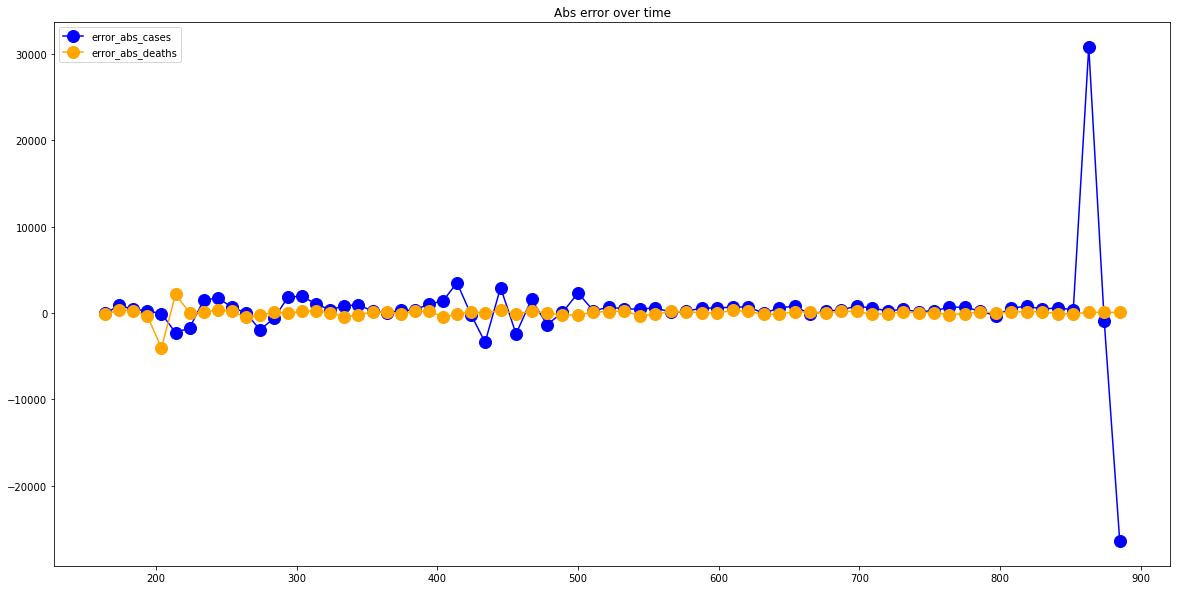

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  314.9710144927536
RMSE =  444.3696887613455
-- Germany performances for deaths --
MAE =  32.01449275362319
RMSE =  52.312744034372706


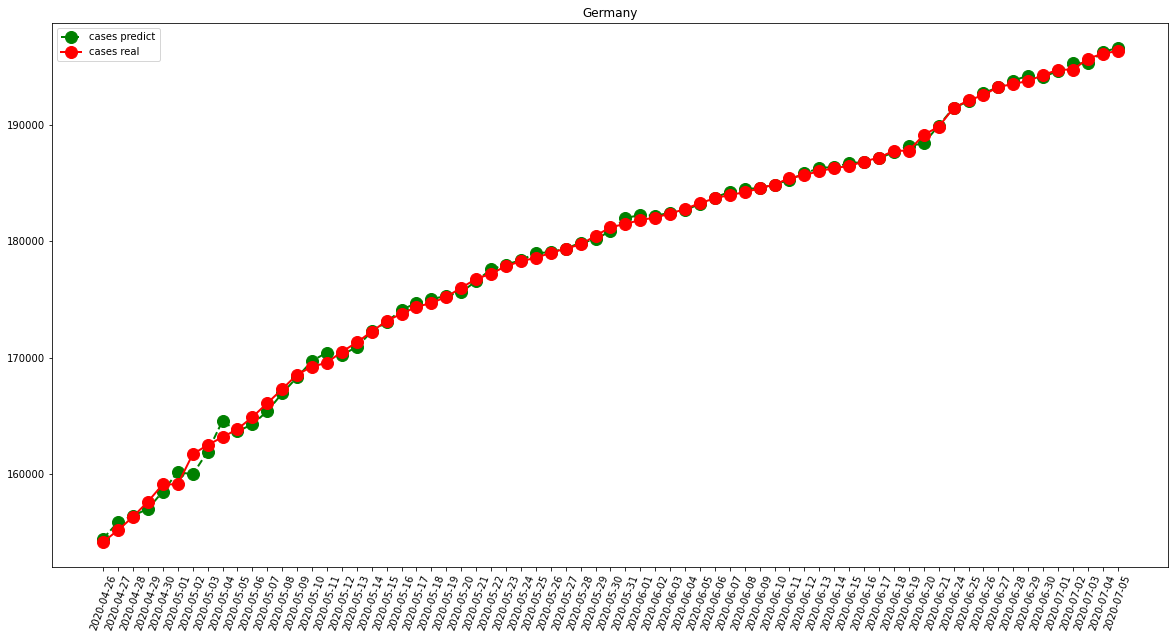

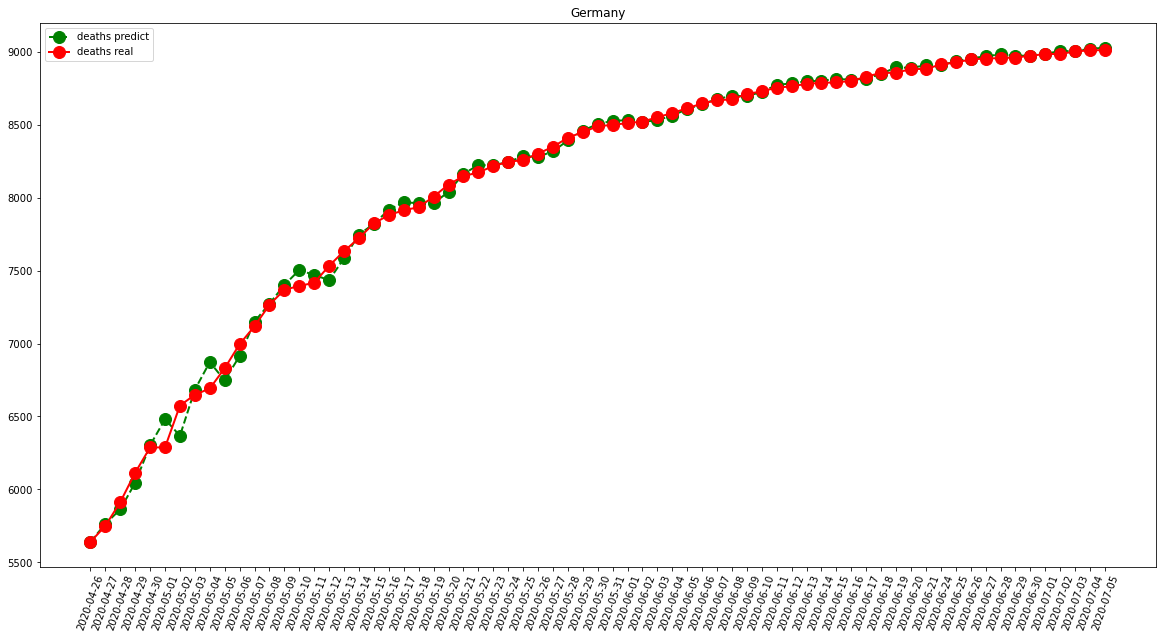

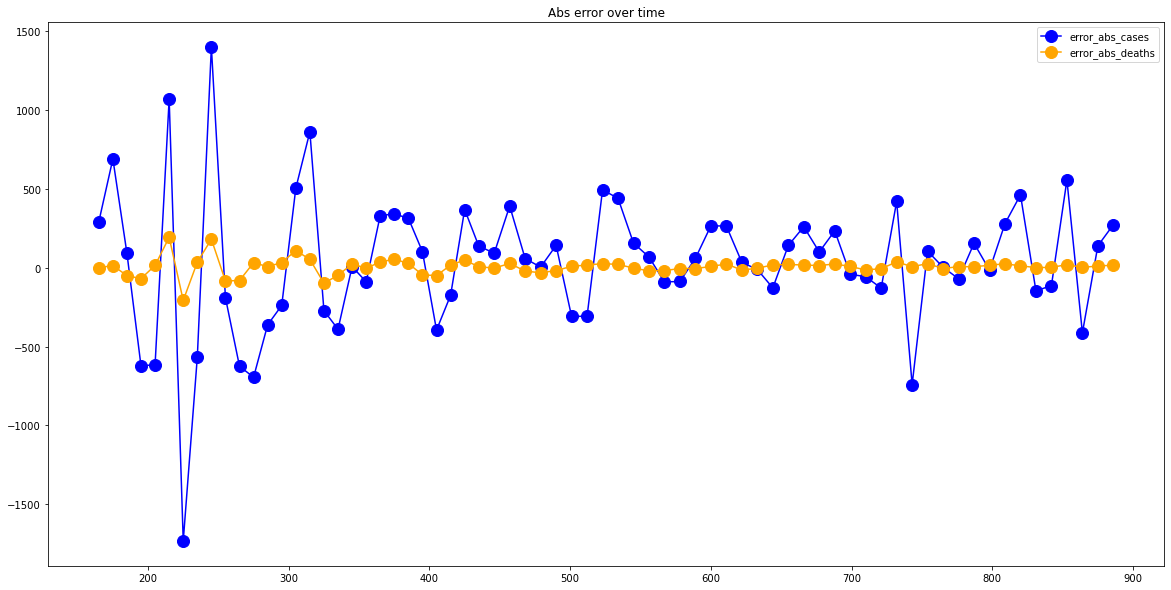

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  285.7826086956522
RMSE =  363.7324825205741
-- Iran performances for deaths --
MAE =  17.753623188405797
RMSE =  29.304251064219038


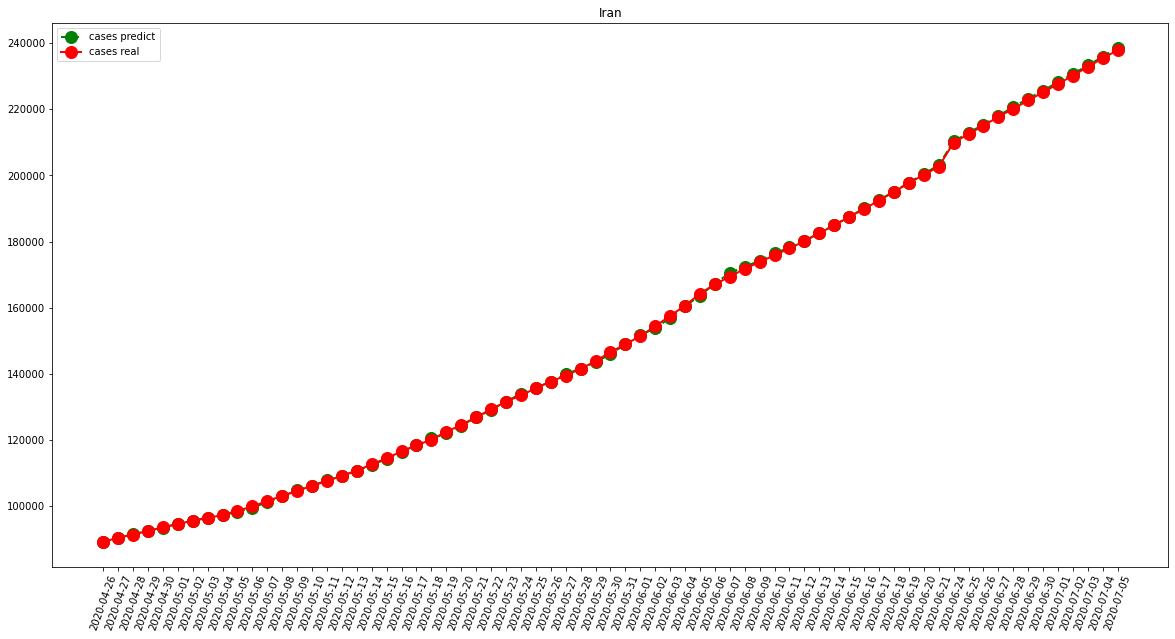

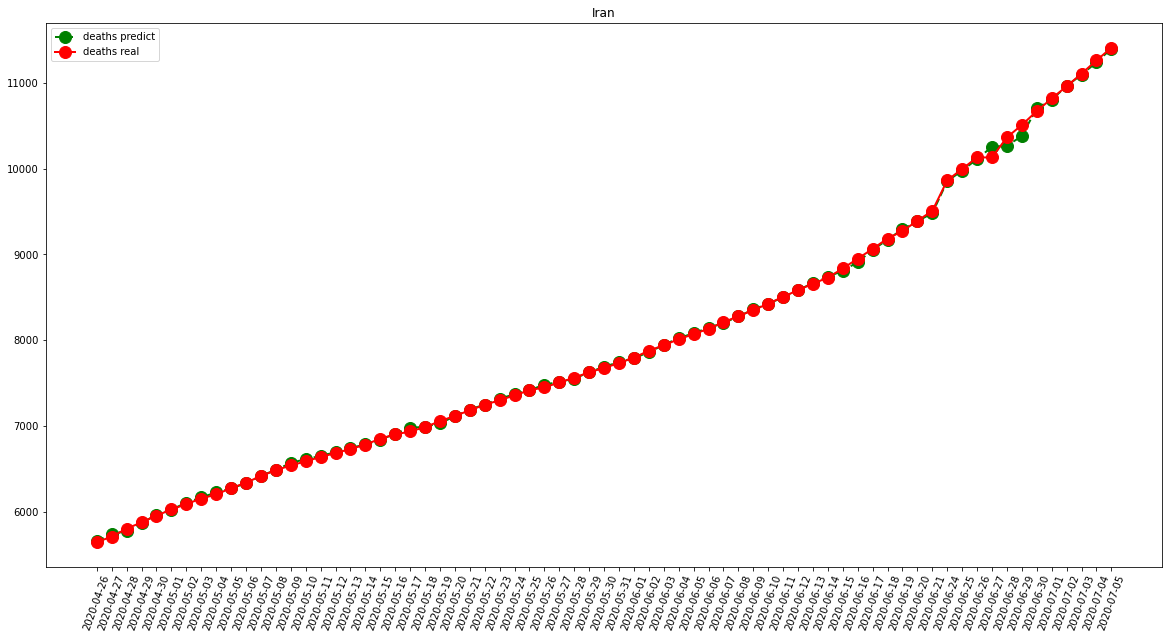

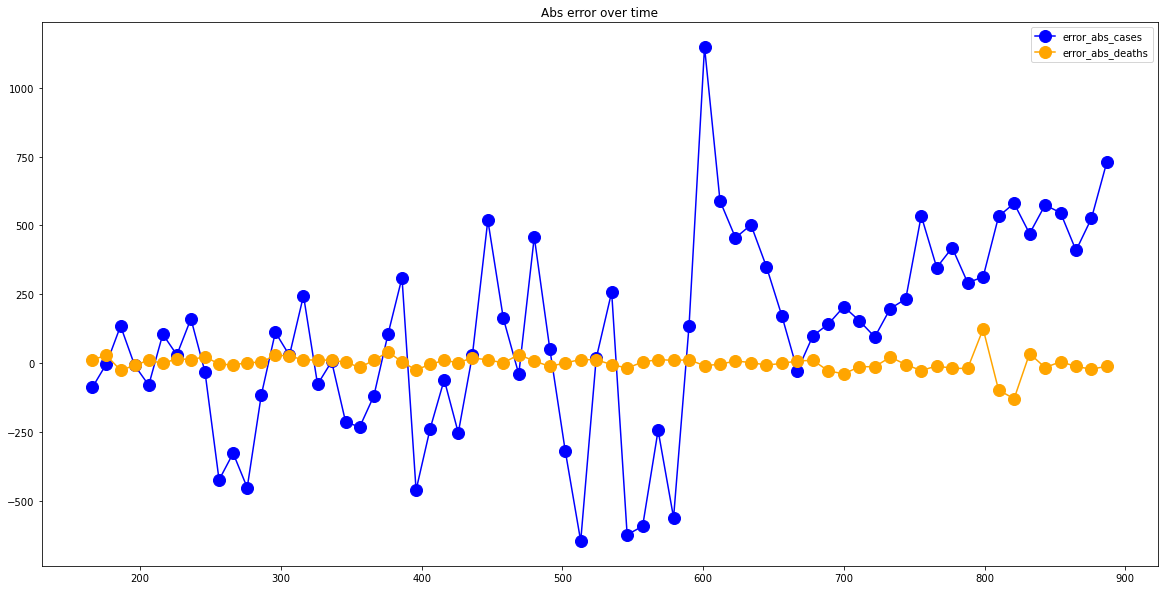

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  269.2028985507246
RMSE =  413.31079298054016
-- Turkey performances for deaths --
MAE =  26.579710144927535
RMSE =  122.19324206271435


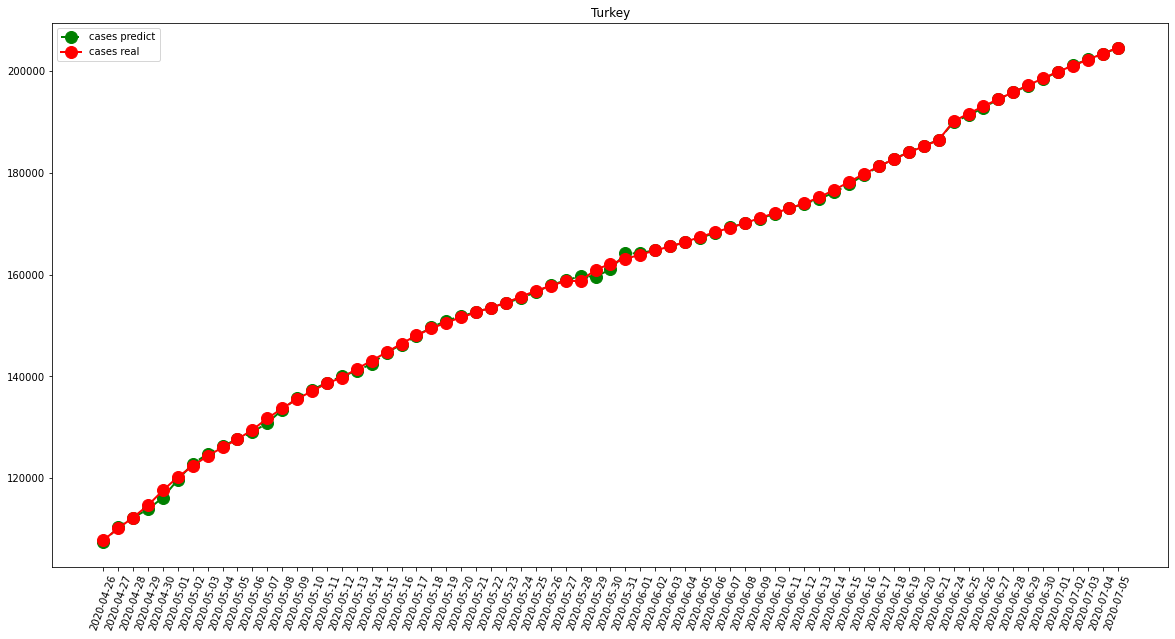

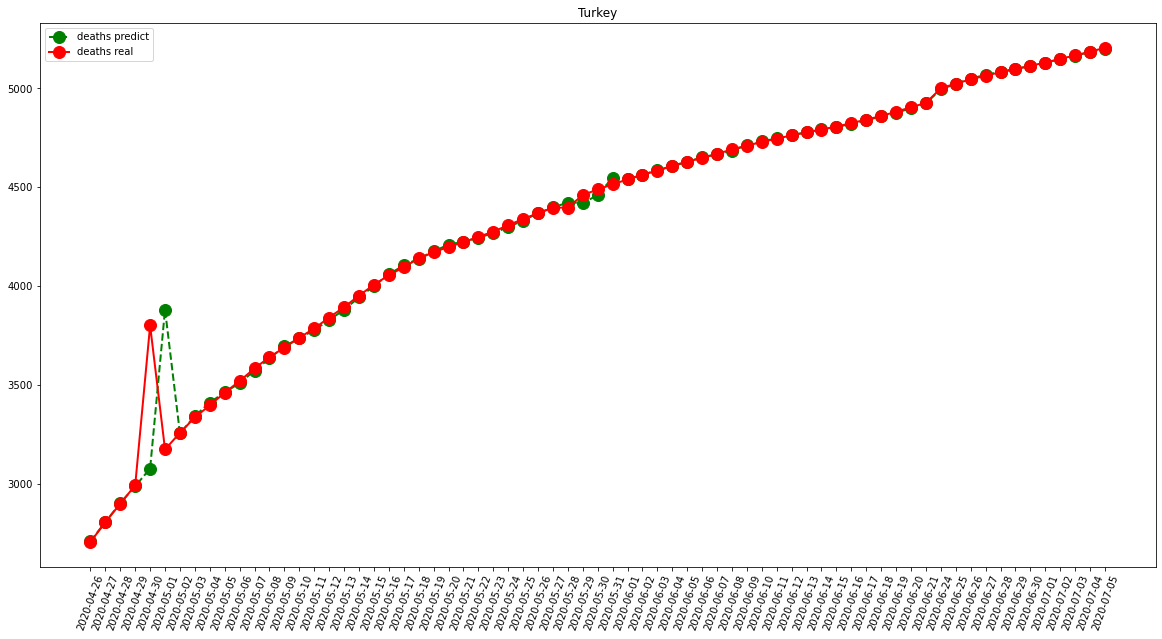

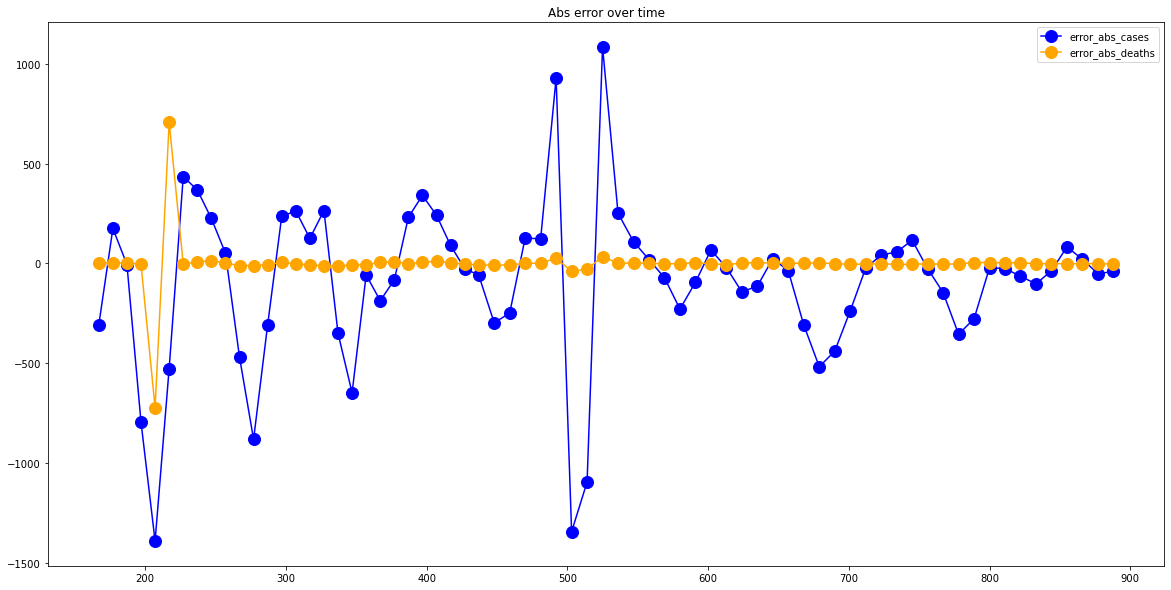

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  8644.904761904761
RMSE =  10999.049852903961
-- Brazil performances for deaths --
MAE =  364.42857142857144
RMSE =  455.20895254398334


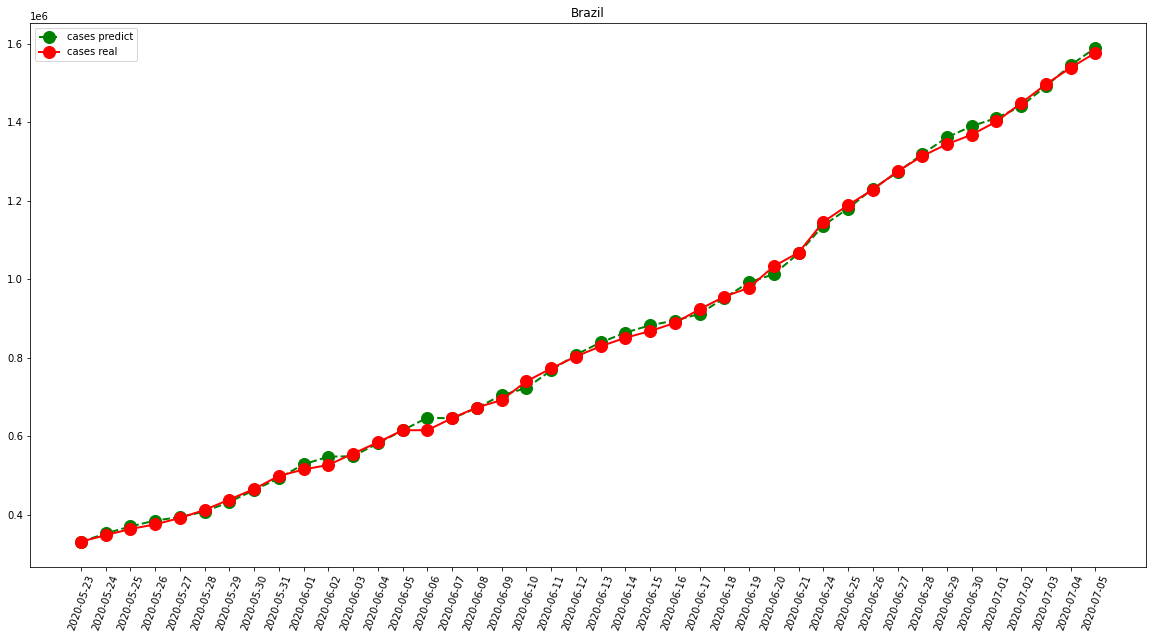

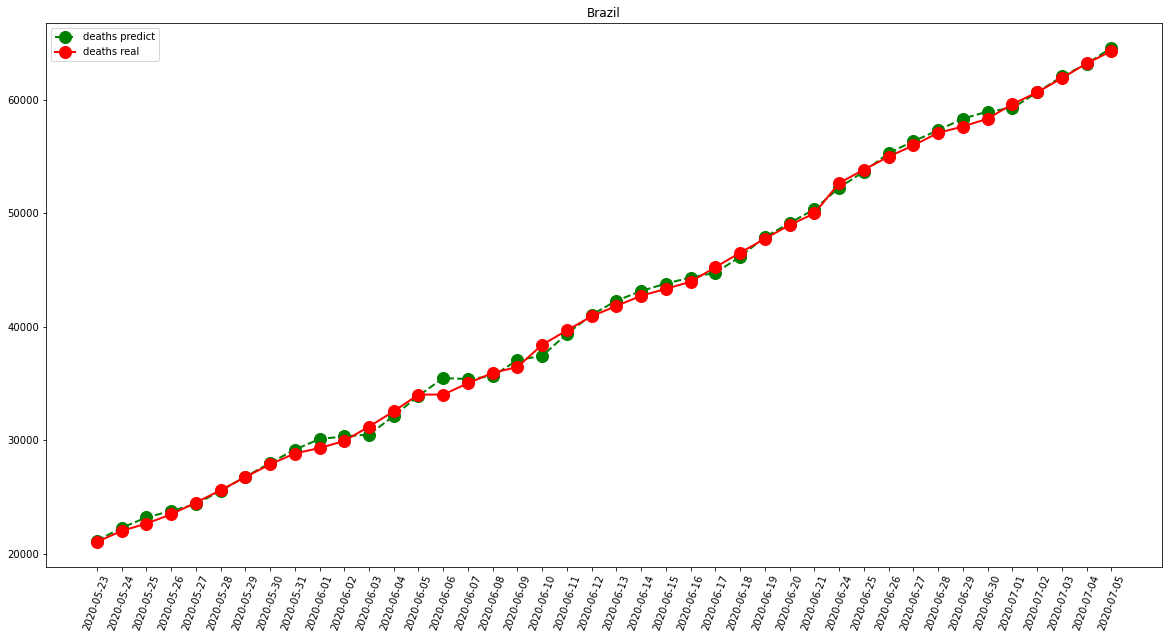

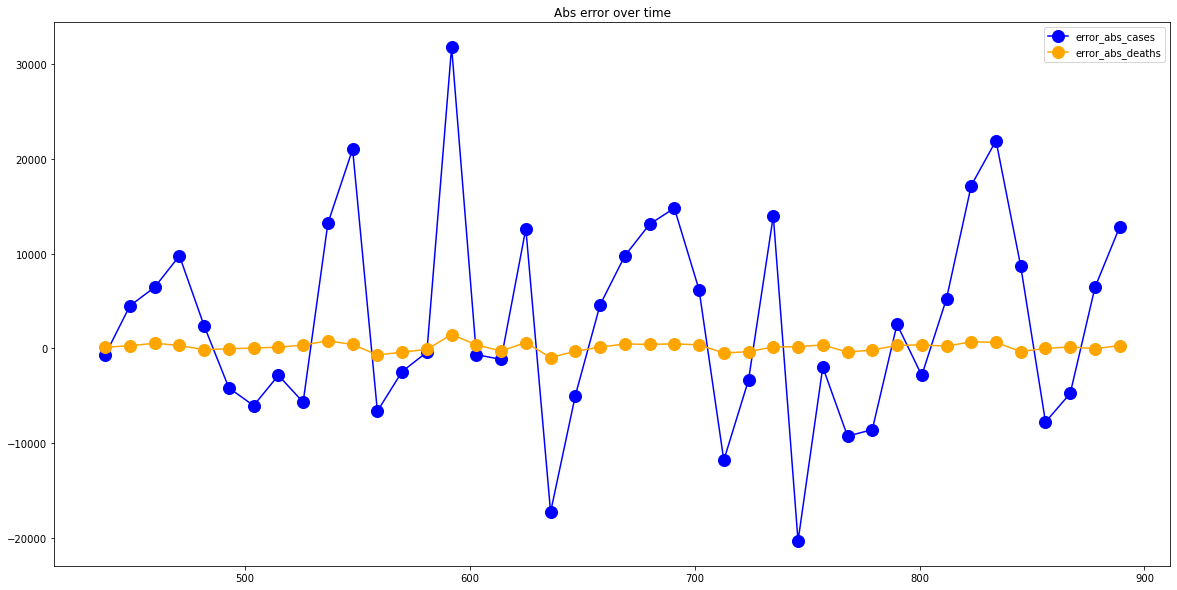

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)